# Notebook MLOlympiad for Students - TopVistos EUA - Kaggle
https://www.kaggle.com/competitions/ml-olympiad-for-students-topvistos-eua/data

In [304]:
# Conectar no google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar as Bibliotecas

In [305]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
import torch

# Arquivos do Projeto

In [306]:
# Importar o DataSet do google drive
df_sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/sample_submission.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/train.csv')

## Dataframe Exemplo de Submissão (df_sample_submission)

In [307]:
df_sample_submission.head()

,id_do_caso,status_do_caso
0,EZYV01,0
1,EZYV02,1
2,EZYV03,0
3,EZYV04,0
4,EZYV05,1


## Dataframe Teste (df_test)

In [308]:
df_test

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,EZYV22339,Ásia,Ensino Superior,S,N,2414,1973,Nordeste,103320.800,Ano,N
1,EZYV9333,Ásia,Mestrado,N,S,2928,1937,Oeste,49786.350,Ano,S
2,EZYV9740,Ásia,Ensino Superior,S,N,1836,1999,Oeste,60855.830,Ano,S
3,EZYV3328,Ásia,Ensino Superior,S,N,122,2004,Sul,82379.060,Semana,S
4,EZYV12321,América do Sul,Ensino Superior,S,S,1720,2003,Nordeste,6719.810,Ano,S
...,...,...,...,...,...,...,...,...,...,...,...
7639,EZYV19907,América do Norte,Ensino Superior,N,N,66,2008,Oeste,70.599,Hora,S
7640,EZYV576,Ásia,Ensino Médio,S,N,4040,1994,Meio-Oeste,60158.590,Ano,S
7641,EZYV1804,Ásia,Mestrado,S,N,32503,1925,Sul,44555.120,Ano,S
7642,EZYV13543,América do Norte,Mestrado,S,N,1894,2000,Sul,97830.730,Ano,S


## Dataframe Treino (df_train)

In [309]:
df_train

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,S,Aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,Ásia,Mestrado,S,N,95347,1995,Oeste,69692.24,Ano,S,Aprovado
17832,EZYV13200,Europa,Ensino Médio,N,N,1483,1886,Sul,136237.62,Ano,S,Negado
17833,EZYV8903,América do Norte,Mestrado,N,N,1504,2010,Nordeste,118187.30,Ano,S,Negado
17834,EZYV6163,América do Norte,Doutorado,S,N,251967,2010,Meio-Oeste,93133.40,Ano,S,Aprovado


# Pré-processamento dos dados de treino (df_train)
Isso pode incluir a transformação de variáveis categóricas em numéricas, normalização/escalonamento de variáveis numéricas, codificação one-hot, etc.

In [310]:
# Definindo uma nova variável para o dataset principal não ser corrompido
df_balanced = df_train

# Selecionar as colunas categóricas
categorical_columns = ['tem_experiencia_de_trabalho', 'requer_treinamento_de_trabalho', 'posicao_em_tempo_integral',
                       'continente', 'educacao_do_empregado', 'regiao_de_emprego']

# Aplicar a codificação one-hot nas colunas categóricas
df_balanced_encoded = pd.get_dummies(df_balanced, columns=categorical_columns)

# Separar os recursos (features) e o rótulo (target)
X = df_balanced_encoded.drop('status_do_caso', axis=1)
y = df_balanced_encoded['status_do_caso']

In [311]:
df_balanced_encoded

,id_do_caso,num_de_empregados,ano_de_estabelecimento,salario_prevalecente,unidade_de_salario,status_do_caso,tem_experiencia_de_trabalho_N,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_N,requer_treinamento_de_trabalho_S,...,continente_Ásia,educacao_do_empregado_Doutorado,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul
0,EZYV10567,2087,1855,69711.24,Ano,Negado,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,EZYV5505,5991,2003,52931.38,Ano,Aprovado,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
2,EZYV5207,1426,2000,110830.21,Ano,Negado,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
3,EZYV7545,3846,1992,91884.68,Semana,Negado,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
4,EZYV16071,3957,1949,138155.24,Ano,Aprovado,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1995,69692.24,Ano,Aprovado,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
17832,EZYV13200,1483,1886,136237.62,Ano,Negado,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
17833,EZYV8903,1504,2010,118187.30,Ano,Negado,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
17834,EZYV6163,251967,2010,93133.40,Ano,Aprovado,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0


In [312]:
# Mostrando todas as colunas do DataSet df_balanced_encoded
df_balanced_encoded.columns

Index(['id_do_caso', 'num_de_empregados', 'ano_de_estabelecimento',
       'salario_prevalecente', 'unidade_de_salario', 'status_do_caso',
       'tem_experiencia_de_trabalho_N', 'tem_experiencia_de_trabalho_S',
       'requer_treinamento_de_trabalho_N', 'requer_treinamento_de_trabalho_S',
       'posicao_em_tempo_integral_N', 'posicao_em_tempo_integral_S',
       'continente_América do Norte', 'continente_América do Sul',
       'continente_Europa', 'continente_Oceania', 'continente_África',
       'continente_Ásia', 'educacao_do_empregado_Doutorado',
       'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Ensino Superior',
       'educacao_do_empregado_Mestrado', 'regiao_de_emprego_Ilha',
       'regiao_de_emprego_Meio-Oeste', 'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul'],
      dtype='object')

In [313]:
# deletar as colunas categóricas_N
del df_balanced_encoded['tem_experiencia_de_trabalho_N']
del df_balanced_encoded['requer_treinamento_de_trabalho_N']
del df_balanced_encoded['posicao_em_tempo_integral_N']

# Selecionar as colunas categóricas
categorical_columns = ['status_do_caso']

# Aplicar a codificação one-hot nas colunas categóricas
df_balanced_encoded = pd.get_dummies(df_balanced_encoded, columns=categorical_columns)

# deletando a coluna status_do_caso_Negado
del df_balanced_encoded['status_do_caso_Negado']

df_balanced_encoded

,id_do_caso,num_de_empregados,ano_de_estabelecimento,salario_prevalecente,unidade_de_salario,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,...,educacao_do_empregado_Doutorado,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado
0,EZYV10567,2087,1855,69711.24,Ano,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,EZYV5505,5991,2003,52931.38,Ano,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,EZYV5207,1426,2000,110830.21,Ano,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,EZYV7545,3846,1992,91884.68,Semana,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,EZYV16071,3957,1949,138155.24,Ano,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1995,69692.24,Ano,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
17832,EZYV13200,1483,1886,136237.62,Ano,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
17833,EZYV8903,1504,2010,118187.30,Ano,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
17834,EZYV6163,251967,2010,93133.40,Ano,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1


Listando os valores únicos de cada coluna

In [314]:
df_balanced_encoded.info

<bound method DataFrame.info of       id_do_caso  num_de_empregados  ano_de_estabelecimento  \
0      EZYV10567               2087                    1855   
1       EZYV5505               5991                    2003   
2       EZYV5207               1426                    2000   
3       EZYV7545               3846                    1992   
4      EZYV16071               3957                    1949   
...          ...                ...                     ...   
17831  EZYV17821              95347                    1995   
17832  EZYV13200               1483                    1886   
17833   EZYV8903               1504                    2010   
17834   EZYV6163             251967                    2010   
17835   EZYV4219               4116                    2008   

       salario_prevalecente unidade_de_salario  tem_experiencia_de_trabalho_S  \
0                  69711.24                Ano                              0   
1                  52931.38                Ano   

In [315]:
# Listando os valores únicos de cada coluna
df_balanced_encoded.nunique()

id_do_caso                               17836
num_de_empregados                         6294
ano_de_estabelecimento                     199
salario_prevalecente                     17827
unidade_de_salario                           4
tem_experiencia_de_trabalho_S                2
requer_treinamento_de_trabalho_S             2
posicao_em_tempo_integral_S                  2
continente_América do Norte                  2
continente_América do Sul                    2
continente_Europa                            2
continente_Oceania                           2
continente_África                            2
continente_Ásia                              2
educacao_do_empregado_Doutorado              2
educacao_do_empregado_Ensino Médio           2
educacao_do_empregado_Ensino Superior        2
educacao_do_empregado_Mestrado               2
regiao_de_emprego_Ilha                       2
regiao_de_emprego_Meio-Oeste                 2
regiao_de_emprego_Nordeste                   2
regiao_de_emp

In [316]:
# Listando os valores únicos da coluna continente
# df_balanced_encoded['continente'].unique()

In [317]:
# Listando os valores únicos da coluna educacao_do_empregado
# df_balanced_encoded['educacao_do_empregado'].unique()

In [318]:
# Listando os valores únicos da coluna regiao_de_emprego
# df_balanced_encoded['regiao_de_emprego'].unique()

In [319]:
# Listando os valores únicos da coluna unidade_de_salario
df_balanced_encoded['unidade_de_salario'].unique()

array(['Ano', 'Semana', 'Hora', 'Mês'], dtype=object)

In [320]:
# Transformando valores únicos de strings em valores numéricos
from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df_balanced_encoded['continente_encoded'] = label_encoder.fit_transform(df_balanced_encoded['continente'])

# label_encoder = LabelEncoder()
# df_balanced_encoded['educacao_do_empregado_encoded'] = label_encoder.fit_transform(df_balanced_encoded['educacao_do_empregado'])

# label_encoder = LabelEncoder()
# df_balanced_encoded['regiao_de_emprego_encoded'] = label_encoder.fit_transform(df_balanced_encoded['regiao_de_emprego'])

label_encoder = LabelEncoder()
df_balanced_encoded['unidade_de_salario_encoded'] = label_encoder.fit_transform(df_balanced_encoded['unidade_de_salario'])

In [321]:
# print(df_balanced_encoded['continente_encoded'].unique())

In [322]:
# print(df_balanced_encoded['educacao_do_empregado_encoded'].unique())

In [323]:
# print(df_balanced_encoded['regiao_de_emprego_encoded'].unique())

In [324]:
print(df_balanced_encoded['unidade_de_salario_encoded'].unique())

[0 3 1 2]


In [325]:
df_balanced_encoded

,id_do_caso,num_de_empregados,ano_de_estabelecimento,salario_prevalecente,unidade_de_salario,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,...,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,unidade_de_salario_encoded
0,EZYV10567,2087,1855,69711.24,Ano,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,EZYV5505,5991,2003,52931.38,Ano,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,EZYV5207,1426,2000,110830.21,Ano,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,EZYV7545,3846,1992,91884.68,Semana,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,3
4,EZYV16071,3957,1949,138155.24,Ano,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1995,69692.24,Ano,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
17832,EZYV13200,1483,1886,136237.62,Ano,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
17833,EZYV8903,1504,2010,118187.30,Ano,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
17834,EZYV6163,251967,2010,93133.40,Ano,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [326]:
# Delentando colunas
df_balanced_encoded_filtered = df_balanced_encoded

# del df_balanced_encoded_filtered['continente']
# del df_balanced_encoded_filtered['educacao_do_empregado']
# del df_balanced_encoded_filtered['regiao_de_emprego']
del df_balanced_encoded_filtered['unidade_de_salario']

df_balanced_encoded_filtered

,id_do_caso,num_de_empregados,ano_de_estabelecimento,salario_prevalecente,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,...,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,unidade_de_salario_encoded
0,EZYV10567,2087,1855,69711.24,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,EZYV5505,5991,2003,52931.38,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,EZYV5207,1426,2000,110830.21,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,EZYV7545,3846,1992,91884.68,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,3
4,EZYV16071,3957,1949,138155.24,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1995,69692.24,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
17832,EZYV13200,1483,1886,136237.62,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
17833,EZYV8903,1504,2010,118187.30,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
17834,EZYV6163,251967,2010,93133.40,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [327]:
# Transformando a coluna ano_de_estabelecimento para anos_estabelecimento
# calculando a diferença entre o ano atual e o ano de criação do estabelecimento
ano_atual = 2023
df_balanced_encoded_filtered['anos_estabelecimento'] = ano_atual - df_balanced_encoded_filtered['ano_de_estabelecimento']
del df_balanced_encoded_filtered['ano_de_estabelecimento']
df_balanced_encoded_filtered

,id_do_caso,num_de_empregados,salario_prevalecente,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,...,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,unidade_de_salario_encoded,anos_estabelecimento
0,EZYV10567,2087,69711.24,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,168
1,EZYV5505,5991,52931.38,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,20
2,EZYV5207,1426,110830.21,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,23
3,EZYV7545,3846,91884.68,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,3,31
4,EZYV16071,3957,138155.24,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,69692.24,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,28
17832,EZYV13200,1483,136237.62,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,137
17833,EZYV8903,1504,118187.30,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,13
17834,EZYV6163,251967,93133.40,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,13


In [328]:
# Movendo a coluna unidade_de_salario_encoded para a posição 3

# Obter a lista de todas as colunas do DataFrame
colunas = df_balanced_encoded_filtered.columns.tolist()

# Remover a coluna 'unidade_de_salario' do seu índice original
colunas.remove('unidade_de_salario_encoded')

# Inserir a coluna 'unidade_de_salario' na nova posição (índice 3)
colunas.insert(3, 'unidade_de_salario_encoded')

# Reordenar as colunas do DataFrame com a nova ordem
df_balanced_encoded_filtered = df_balanced_encoded_filtered[colunas]

# Mostrando a nova ordem
df_balanced_encoded_filtered

,id_do_caso,num_de_empregados,salario_prevalecente,unidade_de_salario_encoded,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,...,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,anos_estabelecimento
0,EZYV10567,2087,69711.24,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,168
1,EZYV5505,5991,52931.38,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,20
2,EZYV5207,1426,110830.21,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,23
3,EZYV7545,3846,91884.68,3,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,31
4,EZYV16071,3957,138155.24,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,69692.24,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,28
17832,EZYV13200,1483,136237.62,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,137
17833,EZYV8903,1504,118187.30,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,13
17834,EZYV6163,251967,93133.40,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,13


Normalizando o salario_prevalecente

In [329]:
df_balanced_encoded_filtered['salario_prevalecente'].dtype

dtype('float64')

In [330]:
df_balanced_encoded_filtered['unidade_de_salario_encoded'].dtype

dtype('int64')

In [331]:
# Criar uma cópia do DataFrame original
df_balanced_encoded_filtered_normal = df_balanced_encoded_filtered.copy()

# Aplicar as modificações na coluna 'salario_prevalecente' com base na coluna 'unidade_de_salario_encoded'
df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 0,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] / 48,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 1,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] * 96,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 2,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] / 4,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 3,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] * 1,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal

,id_do_caso,num_de_empregados,salario_prevalecente,unidade_de_salario_encoded,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,...,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,anos_estabelecimento
0,EZYV10567,2087,1452.317500,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,168
1,EZYV5505,5991,1102.737083,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,20
2,EZYV5207,1426,2308.962708,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,23
3,EZYV7545,3846,91884.680000,3,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,31
4,EZYV16071,3957,2878.234167,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1451.921667,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,28
17832,EZYV13200,1483,2838.283750,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,137
17833,EZYV8903,1504,2462.235417,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,13
17834,EZYV6163,251967,1940.279167,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,13


In [332]:
# Mudando o nome da coluna salario_prevalecente para salario_prevalecente_semanal
df_balanced_encoded_filtered_normal.rename(columns={'salario_prevalecente': 'salario_prevalecente_semanal'}, inplace=True)

# Delentando a coluna unidade_de_salario_encoded
del df_balanced_encoded_filtered_normal['unidade_de_salario_encoded']

# Arredonando a coluna salario_prevalecente_semanal para 2 casas decimais
df_balanced_encoded_filtered_normal['salario_prevalecente_semanal'] = df_balanced_encoded_filtered_normal['salario_prevalecente_semanal'].round(2)

In [333]:
# Renomeando o dataframe para df_normal
df_normal = df_balanced_encoded_filtered_normal
df_normal

,id_do_caso,num_de_empregados,salario_prevalecente_semanal,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,...,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,anos_estabelecimento
0,EZYV10567,2087,1452.32,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,168
1,EZYV5505,5991,1102.74,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,20
2,EZYV5207,1426,2308.96,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,23
3,EZYV7545,3846,91884.68,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,31
4,EZYV16071,3957,2878.23,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1451.92,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,28
17832,EZYV13200,1483,2838.28,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,137
17833,EZYV8903,1504,2462.24,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,13
17834,EZYV6163,251967,1940.28,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,13


# Trabalhando com o novo dataframe (df_normal) balanceado e normalizado

## Salvando o novo dataframe (df_normal) balanceado e normalizado em um arquivo .csv

In [334]:
# Salvando o novo dataframe (df_normal) balanceado e normalizado em um arquivo .csv
# df_normal.to_csv('df_normal.csv', index=False)

In [335]:
df_normal_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/df_normal_2.csv')
df_normal_2

,id_do_caso,num_de_empregados,salario_prevalecente_semanal,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,status_do_caso_Aprovado,continente_encoded,educacao_do_empregado_encoded,regiao_de_emprego_encoded,anos_estabelecimento
0,EZYV10567,2087,1452.32,0,1,1,0,2,1,4,168
1,EZYV5505,5991,1102.74,1,0,1,1,5,3,1,20
2,EZYV5207,1426,2308.96,0,0,1,0,5,1,0,23
3,EZYV7545,3846,91884.68,0,0,1,0,5,1,1,31
4,EZYV16071,3957,2878.23,1,0,1,1,5,2,2,74
...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1451.92,1,0,1,1,5,3,3,28
17832,EZYV13200,1483,2838.28,0,0,1,0,2,1,4,137
17833,EZYV8903,1504,2462.24,0,0,1,0,0,3,2,13
17834,EZYV6163,251967,1940.28,1,0,1,1,0,0,1,13


In [336]:
df_normal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/df_normal.csv')
df_normal

,id_do_caso,num_de_empregados,salario_prevalecente_semanal,tem_experiencia_de_trabalho_S,requer_treinamento_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,...,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Ensino Superior,educacao_do_empregado_Mestrado,regiao_de_emprego_Ilha,regiao_de_emprego_Meio-Oeste,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,anos_estabelecimento
0,EZYV10567,2087,1452.32,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,168
1,EZYV5505,5991,1102.74,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,20
2,EZYV5207,1426,2308.96,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,23
3,EZYV7545,3846,91884.68,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,31
4,EZYV16071,3957,2878.23,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,95347,1451.92,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,28
17832,EZYV13200,1483,2838.28,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,137
17833,EZYV8903,1504,2462.24,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,13
17834,EZYV6163,251967,1940.28,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,13


## Analisando o dataframe (df_normal)

Correlação entre as features

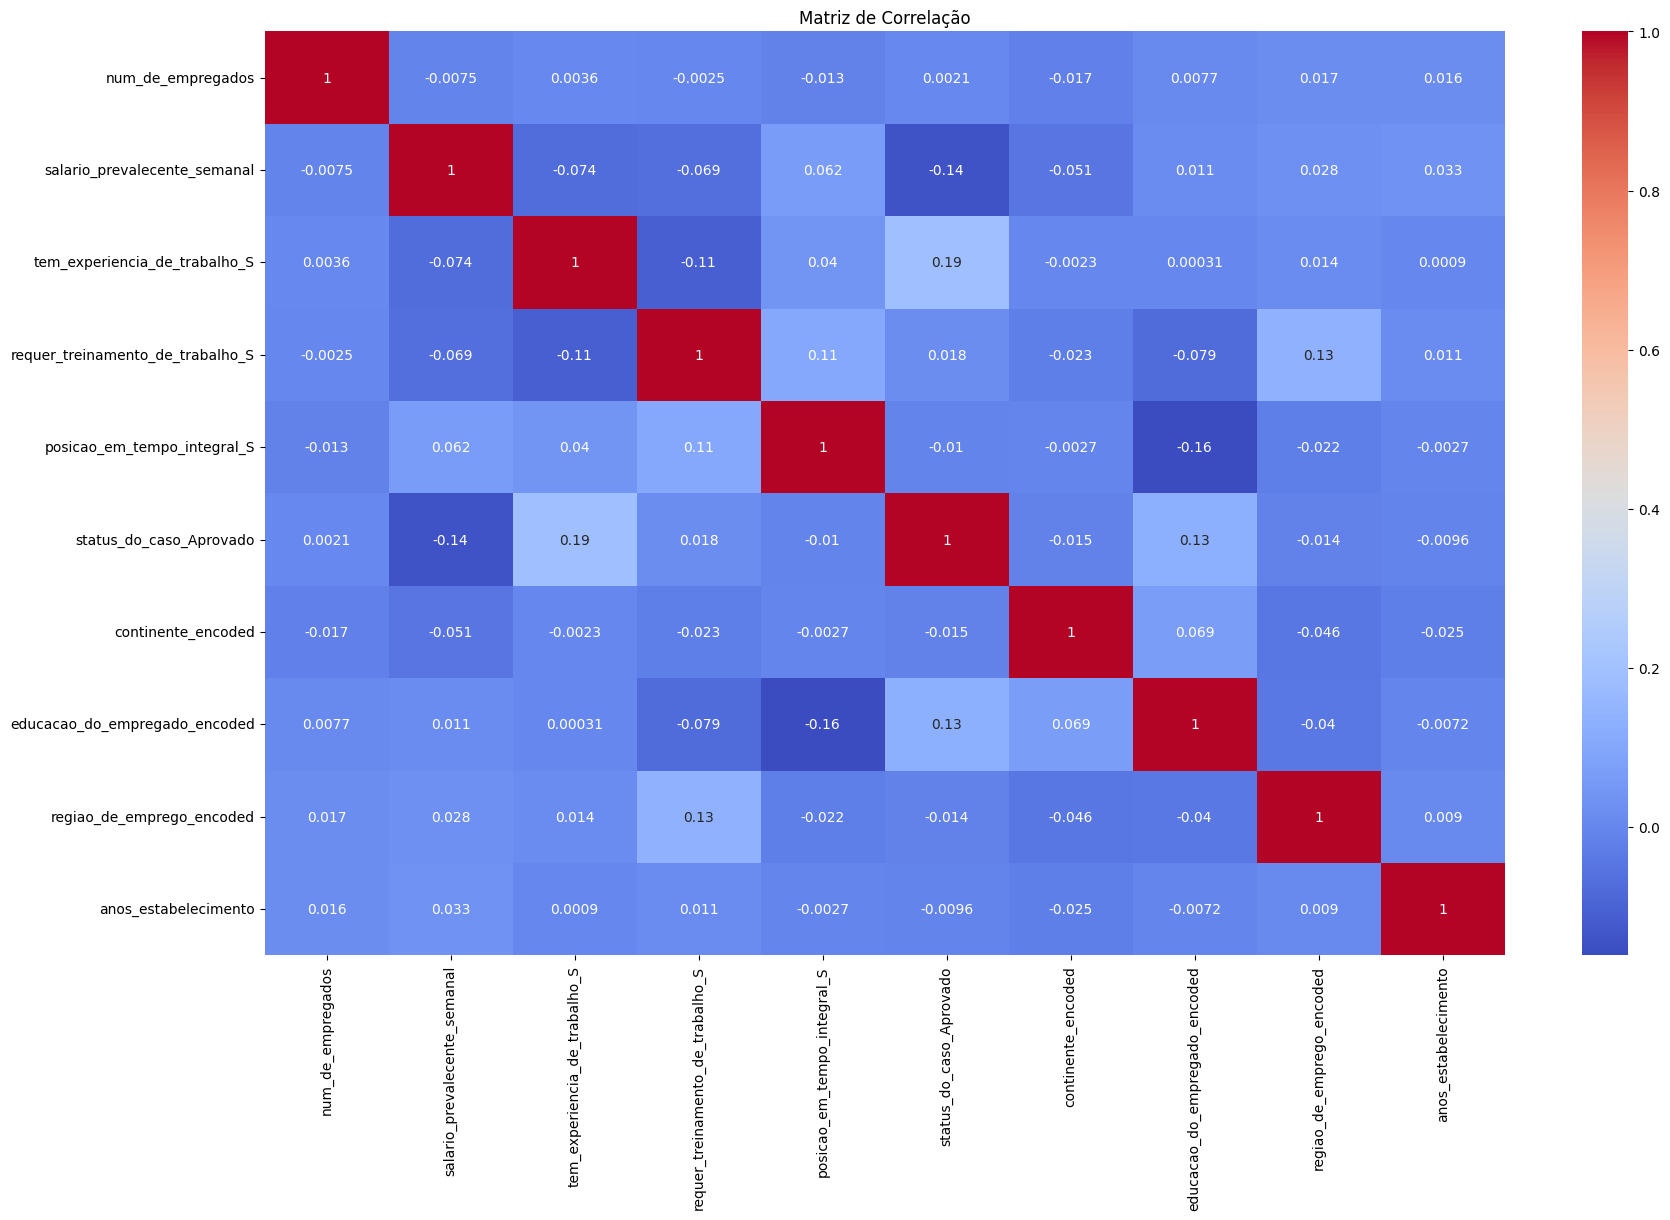

In [337]:
correlation_matrix_3 = df_normal_2.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

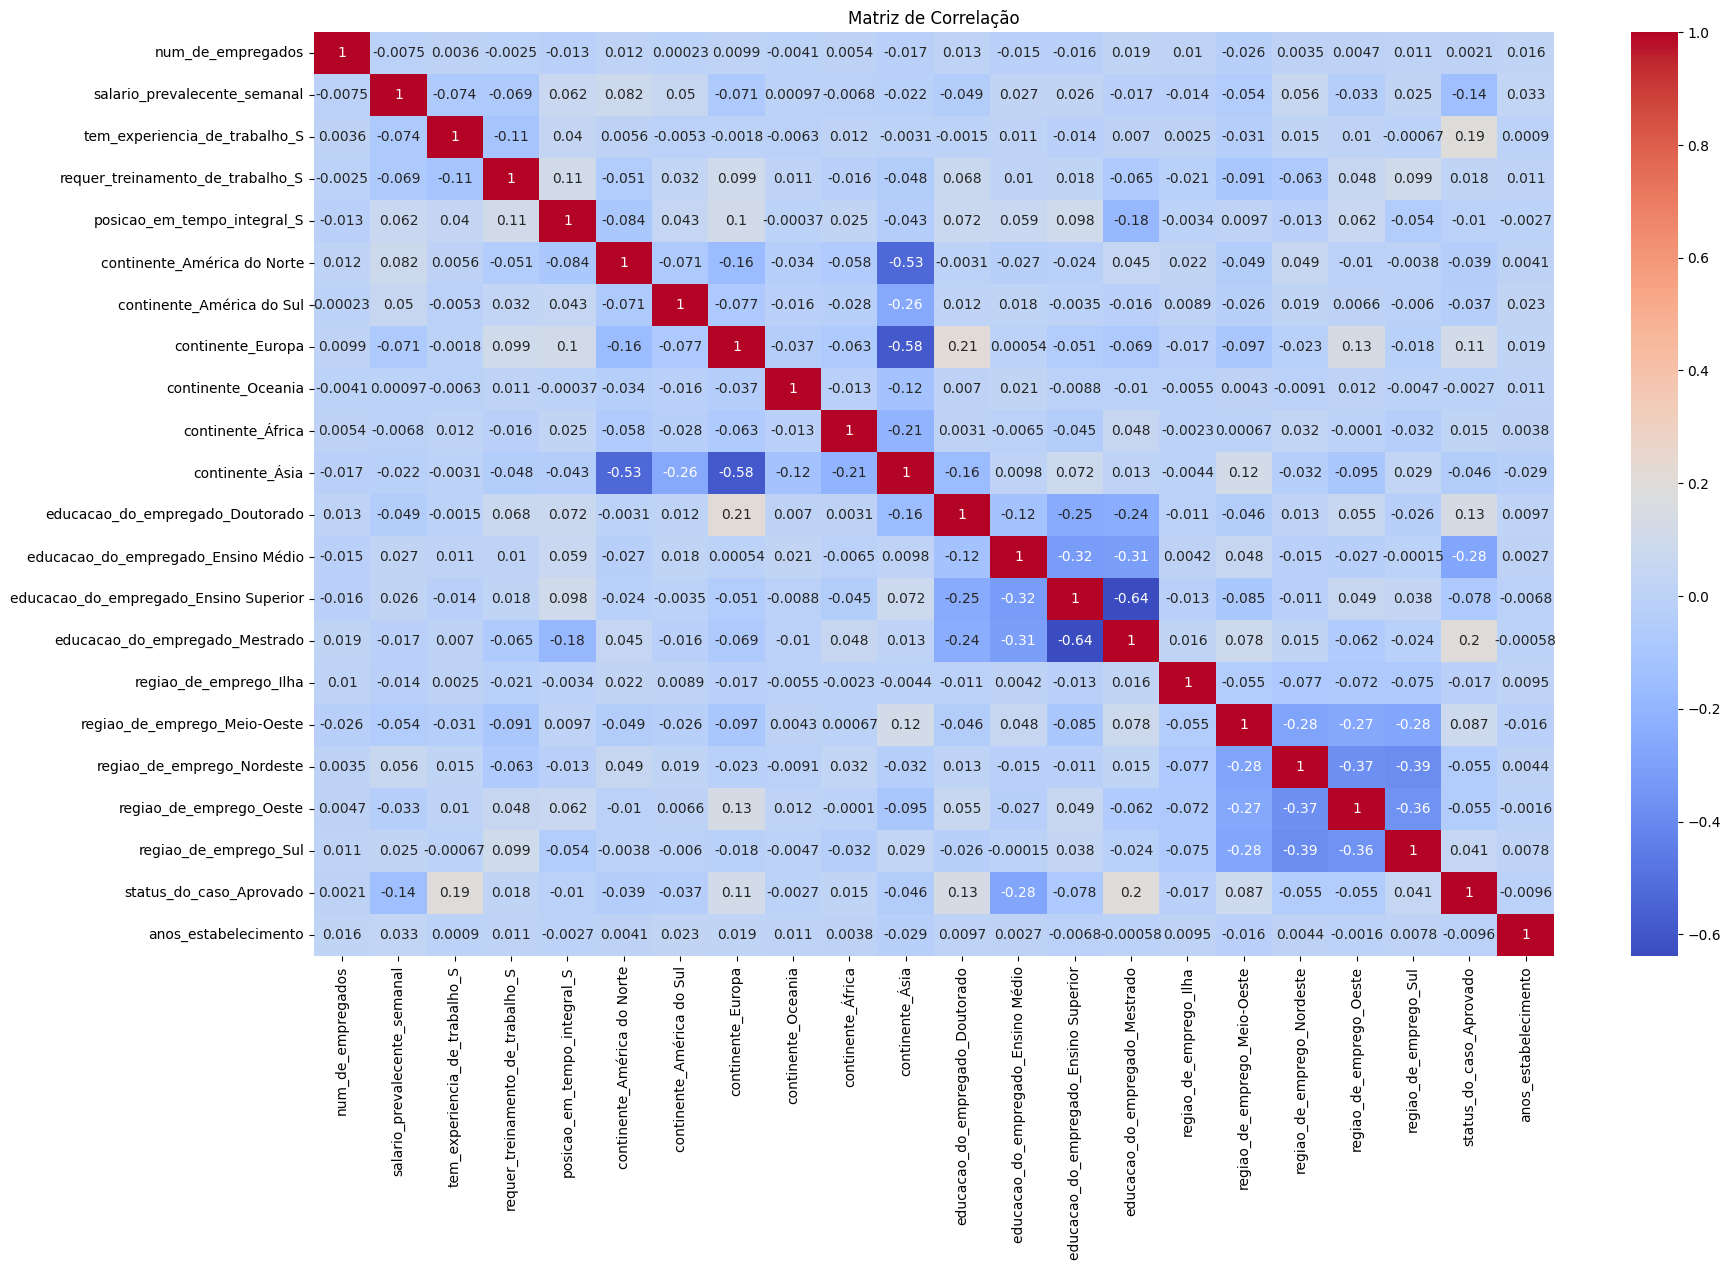

In [338]:
correlation_matrix = df_normal.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [339]:
# Mostrando todas as colunas do DataSet df_normal
df_normal.columns

Index(['id_do_caso', 'num_de_empregados', 'salario_prevalecente_semanal',
       'tem_experiencia_de_trabalho_S', 'requer_treinamento_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Ensino Superior',
       'educacao_do_empregado_Mestrado', 'regiao_de_emprego_Ilha',
       'regiao_de_emprego_Meio-Oeste', 'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado', 'anos_estabelecimento'],
      dtype='object')

Correlação entre features retirando algumas colunas

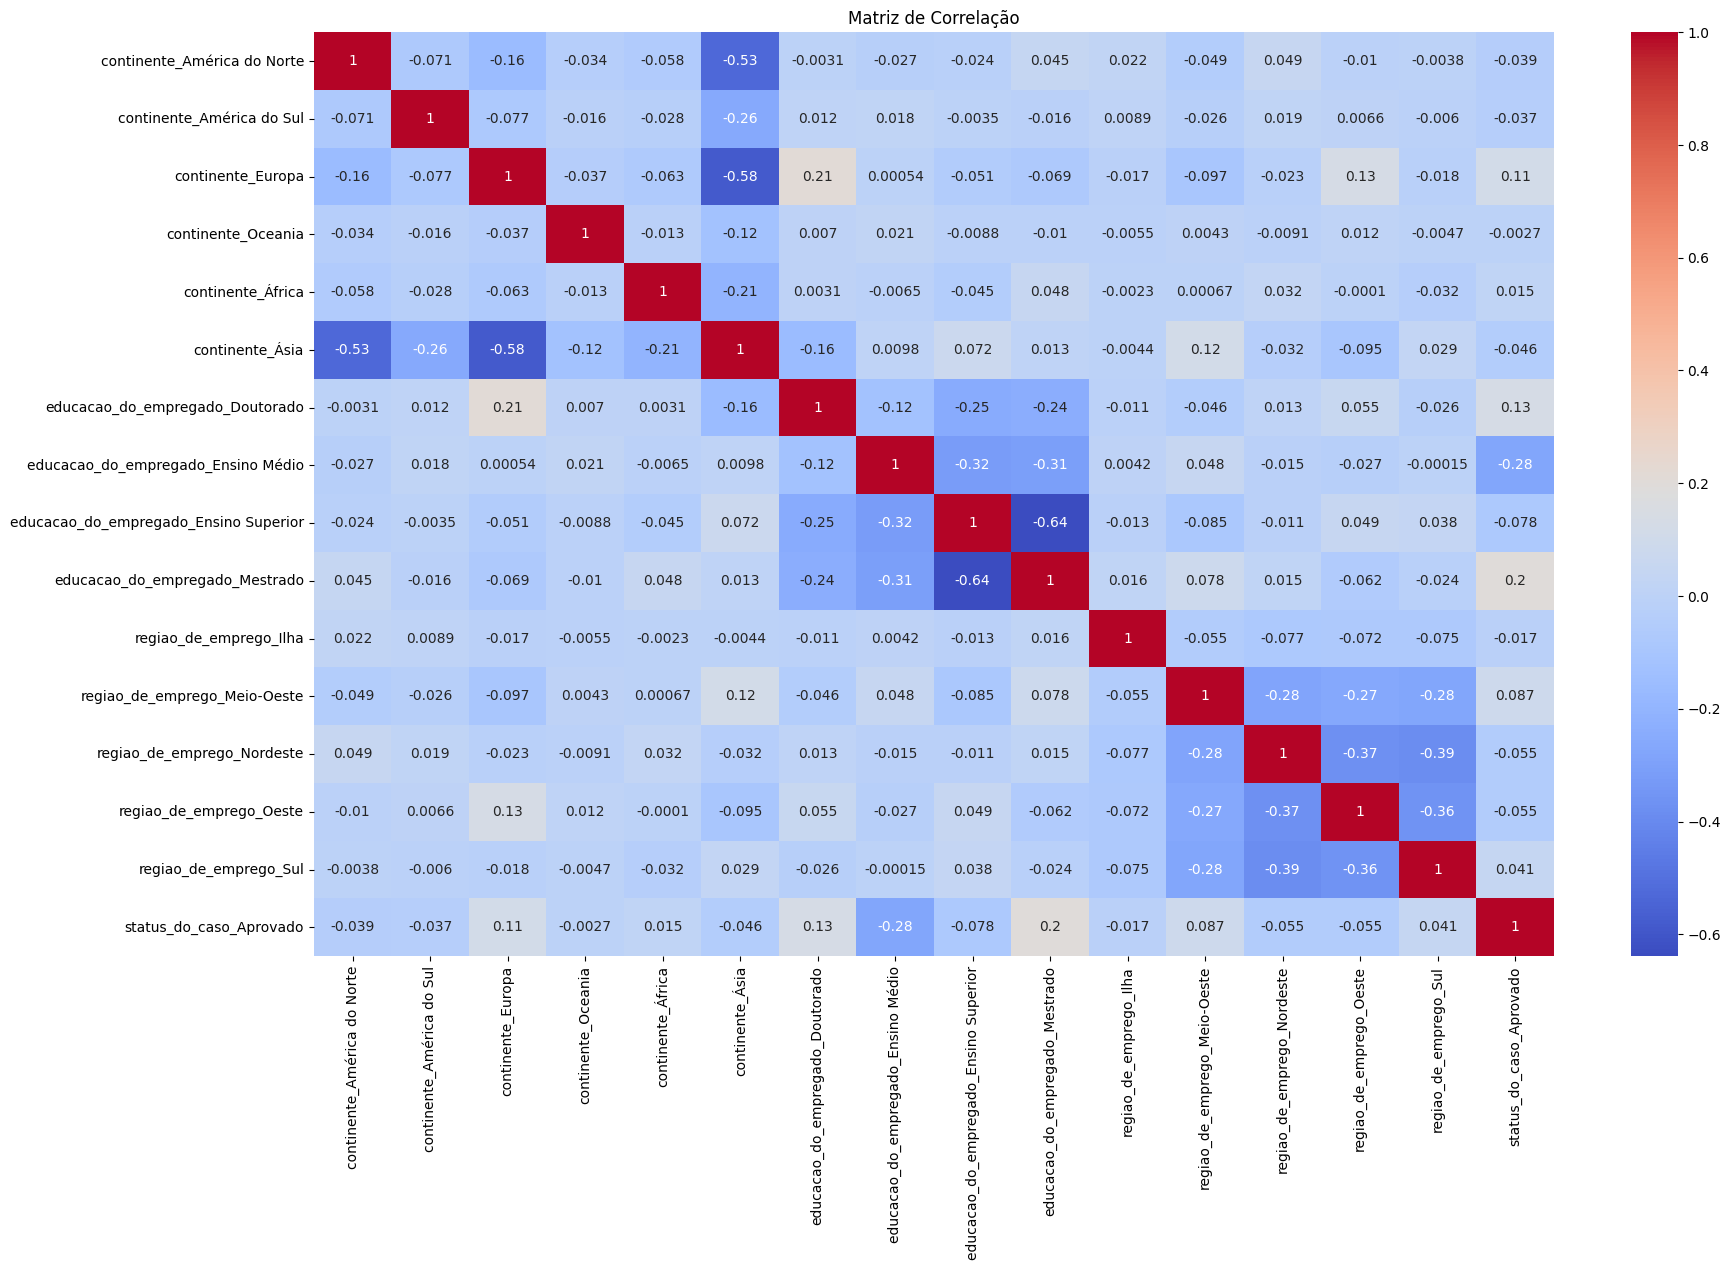

In [340]:
# Criando um subset do dataframe df_normal
df_normal_subset = df_normal.loc[:, [
       'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Ensino Superior',
       'educacao_do_empregado_Mestrado', 'regiao_de_emprego_Ilha',
       'regiao_de_emprego_Meio-Oeste', 'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado'
       ]]
correlation_matrix_2 = df_normal_subset.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [341]:
# colunas do dataframe df_normal_2
df_normal_2.columns

Index(['id_do_caso', 'num_de_empregados', 'salario_prevalecente_semanal',
       'tem_experiencia_de_trabalho_S', 'requer_treinamento_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'status_do_caso_Aprovado',
       'continente_encoded', 'educacao_do_empregado_encoded',
       'regiao_de_emprego_encoded', 'anos_estabelecimento'],
      dtype='object')

# Primeiro modelo
Acurácia: 73.43%

Média Geral: 69.04%

In [342]:
X = df_normal.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y = df_normal['status_do_caso_Aprovado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

classify_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classify_report)

Acurácia: 0.734304932735426
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.39      0.49      1142
           1       0.76      0.89      0.82      2426

    accuracy                           0.73      3568
   macro avg       0.70      0.64      0.65      3568
weighted avg       0.72      0.73      0.71      3568



In [343]:
# Converter o relatório em um DataFrame
classify_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Calcular a média das métricas
mean_metrics = classify_report.mean()

# Excluir a coluna "support" das médias, se necessário
mean_metrics = mean_metrics.drop("support")

# Calcular a média entre as métricas
mean_average = mean_metrics.mean()

# Exibir a média entre as métricas
print("Média das Métricas:")
print(mean_average)

Média das Métricas:
0.6904822654969416


# Segundo Modelo
Acurácia: 72.33%

Média geral: 67.29%

In [344]:
df_normal_subset1 = df_normal.loc[:, [
       'id_do_caso', 'status_do_caso_Aprovado',
       'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Ensino Superior',
       'educacao_do_empregado_Mestrado', 'regiao_de_emprego_Ilha',
       'regiao_de_emprego_Meio-Oeste', 'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul'
]].copy()

X1 = df_normal_subset1.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y1 = df_normal_subset1['status_do_caso_Aprovado']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Acurácia:", accuracy1)

classify_report1 = classification_report(y_test1, y_pred1)
print("Relatório de Classificação:")
print(classify_report1)

Acurácia: 0.7233744394618834
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.34      0.44      1142
           1       0.74      0.91      0.82      2426

    accuracy                           0.72      3568
   macro avg       0.68      0.62      0.63      3568
weighted avg       0.71      0.72      0.70      3568



In [345]:
# Converter o relatório em um DataFrame
classify_report1 = pd.DataFrame(classification_report(y_test1, y_pred1, output_dict=True)).transpose()

# Calcular a média das métricas
mean_metrics1 = classify_report1.mean()

# Excluir a coluna "support" das médias, se necessário
mean_metrics1 = mean_metrics1.drop("support")

# Calcular a média entre as métricas
mean_average1 = mean_metrics1.mean()

# Exibir a média entre as métricas
print("Média das Métricas:")
print(mean_average1)

Média das Métricas:
0.6729153380649411


# Terceiro modelo
Acurácia 73.54%

Média Geral 69.17%

In [346]:
df_normal_subset2 = df_normal.loc[:, [
       'id_do_caso', 'salario_prevalecente_semanal',
       'tem_experiencia_de_trabalho_S', 'requer_treinamento_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Ensino Superior',
       'educacao_do_empregado_Mestrado', 'regiao_de_emprego_Ilha',
       'regiao_de_emprego_Meio-Oeste', 'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado', 'anos_estabelecimento'
]].copy()

X2 = df_normal_subset2.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y2 = df_normal_subset2['status_do_caso_Aprovado']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Acurácia:", accuracy2)

classify_report2 = classification_report(y_test2, y_pred2)
print("Relatório de Classificação:")
print(classify_report2)

Acurácia: 0.7354260089686099
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.39      0.49      1142
           1       0.76      0.90      0.82      2426

    accuracy                           0.74      3568
   macro avg       0.70      0.65      0.65      3568
weighted avg       0.72      0.74      0.71      3568



In [347]:
# Converter o relatório em um DataFrame
classify_report2 = pd.DataFrame(classification_report(y_test2, y_pred2, output_dict=True)).transpose()

# Calcular a média das métricas
mean_metrics2 = classify_report2.mean()

# Excluir a coluna "support" das médias, se necessário
mean_metrics2 = mean_metrics2.drop("support")

# Calcular a média entre as métricas
mean_average2 = mean_metrics2.mean()

# Exibir a média entre as métricas
print("Média das Métricas:")
print(mean_average2)

Média das Métricas:
0.6917763278640562


# Quarto modelo
Acurácia 74.01%

Média Geral 70.33%

In [348]:
df_normal_subset3 = df_normal.loc[:, [
       'id_do_caso', 'salario_prevalecente_semanal',
       'tem_experiencia_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Mestrado',
       'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado', 'anos_estabelecimento'
]].copy()

X3 = df_normal_subset3.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y3 = df_normal_subset3['status_do_caso_Aprovado']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Acurácia:", accuracy3)

classify_report3 = classification_report(y_test3, y_pred3)
print("Relatório de Classificação:")
print(classify_report3)

Acurácia: 0.7401905829596412
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1142
           1       0.78      0.87      0.82      2426

    accuracy                           0.74      3568
   macro avg       0.70      0.67      0.68      3568
weighted avg       0.73      0.74      0.73      3568



In [349]:
# Converter o relatório em um DataFrame
classify_report3 = pd.DataFrame(classification_report(y_test3, y_pred3, output_dict=True)).transpose()

# Calcular a média das métricas
mean_metrics3 = classify_report3.mean()

# Excluir a coluna "support" das médias, se necessário
mean_metrics3 = mean_metrics3.drop("support")

# Calcular a média entre as métricas
mean_average3 = mean_metrics3.mean()

# Exibir a média entre as métricas
print("Média das Métricas:")
print(mean_average3)

Média das Métricas:
0.7033892906341158


# Quinto modelo

---
- Selecionando apenas as features relevantes para melhorar o desempenho do modelo
- Balanceando as features
- Criando uma coluna com a média de salário em relação ao total
- Realizando uma validação cruzada com 3 folds

---


Acurácia 69.88%

Média Geral 69.12%

In [350]:
# Criando um novo subset do dataframe df_normal
# Selecionando apenas as colunas relevantes para o subset
df_normal_subset4 = df_normal.loc[:, [
       'id_do_caso', 'salario_prevalecente_semanal',
       'tem_experiencia_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Mestrado',
       'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado', 'anos_estabelecimento'
]].copy()

# Separando as variáveis independentes (X) e a variável dependente (y)
X4 = df_normal_subset4.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y4 = df_normal_subset4['status_do_caso_Aprovado']

# Dividindo os dados em conjuntos de treinamento e teste
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão logística
# Utilizando a opção class_weight='balanced' para balancear automaticamente os dados
model4 = LogisticRegression(max_iter=1000, class_weight='balanced')
model4.fit(X_train4, y_train4)

# Realizando as previsões no conjunto de teste
y_pred4 = model4.predict(X_test4)

# Calculando a acurácia do modelo
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Acurácia:", accuracy4)

# Gerando o relatório de classificação
classify_report4 = classification_report(y_test4, y_pred4)
print("Relatório de Classificação:")
print(classify_report4)

Acurácia: 0.6995515695067265
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.54      0.43      0.48      1142
           1       0.75      0.83      0.79      2426

    accuracy                           0.70      3568
   macro avg       0.65      0.63      0.63      3568
weighted avg       0.69      0.70      0.69      3568



In [351]:
# Converter o relatório em um DataFrame
classify_report4 = pd.DataFrame(classification_report(y_test4, y_pred4, output_dict=True)).transpose()

# Calcular a média das métricas
mean_metrics4 = classify_report4.mean()

# Excluir a coluna "support" das médias, se necessário
mean_metrics4 = mean_metrics4.drop("support")

# Calcular a média entre as métricas
mean_average4 = mean_metrics4.mean()

# Exibir a média entre as métricas
print("Média das Métricas:")
print(mean_average4)

Média das Métricas:
0.6599053173763286


In [352]:
df_normal_subset4

,id_do_caso,salario_prevalecente_semanal,tem_experiencia_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,continente_África,continente_Ásia,educacao_do_empregado_Doutorado,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Mestrado,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,anos_estabelecimento
0,EZYV10567,1452.32,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,168
1,EZYV5505,1102.74,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,20
2,EZYV5207,2308.96,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,23
3,EZYV7545,91884.68,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,31
4,EZYV16071,2878.23,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,1451.92,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,28
17832,EZYV13200,2838.28,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,137
17833,EZYV8903,2462.24,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,13
17834,EZYV6163,1940.28,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,13


In [353]:
# Criando uma coluna com a média de salário em relação ao total
media_global = df_normal_subset4['salario_prevalecente_semanal'].mean()
df_normal_subset4['salario_em_relacao_media'] = 0
df_normal_subset4.loc[df_normal_subset4['salario_prevalecente_semanal'] > media_global, 'salario_em_relacao_media'] = 1
df_normal_subset4

,id_do_caso,salario_prevalecente_semanal,tem_experiencia_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,continente_África,continente_Ásia,educacao_do_empregado_Doutorado,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Mestrado,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,status_do_caso_Aprovado,anos_estabelecimento,salario_em_relacao_media
0,EZYV10567,1452.32,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,168,0
1,EZYV5505,1102.74,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,20,0
2,EZYV5207,2308.96,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,23,0
3,EZYV7545,91884.68,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,31,1
4,EZYV16071,2878.23,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,1451.92,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,28,0
17832,EZYV13200,2838.28,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,137,0
17833,EZYV8903,2462.24,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,13,0
17834,EZYV6163,1940.28,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,13,0


In [354]:
# Criando um novo subset do dataframe df_normal
# Selecionando apenas as colunas relevantes para o subset
df_normal_subset4 = df_normal_subset4.loc[:, [
       'id_do_caso', 'salario_em_relacao_media',
       'tem_experiencia_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Mestrado',
       'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado', 'anos_estabelecimento'
]].copy()

# Separando as variáveis independentes (X) e a variável dependente (y)
X4 = df_normal_subset4.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y4 = df_normal_subset4['status_do_caso_Aprovado']

# Dividindo os dados em conjuntos de treinamento e teste
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão logística
# Utilizando a opção class_weight='balanced' para balancear automaticamente os dados
model4 = LogisticRegression(max_iter=1000, class_weight='balanced')
model4.fit(X_train4, y_train4)

# Realizando as previsões no conjunto de teste
y_pred4 = model4.predict(X_test4)

# Calculando a acurácia do modelo
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Acurácia:", accuracy4)

# Gerando o relatório de classificação
classify_report4 = classification_report(y_test4, y_pred4)
print("Relatório de Classificação:")
print(classify_report4)

Acurácia: 0.6989910313901345
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59      1142
           1       0.83      0.71      0.76      2426

    accuracy                           0.70      3568
   macro avg       0.67      0.69      0.68      3568
weighted avg       0.73      0.70      0.71      3568



In [355]:
# Converter o relatório em um DataFrame
classify_report4 = pd.DataFrame(classification_report(y_test4, y_pred4, output_dict=True)).transpose()

# Calcular a média das métricas
mean_metrics4 = classify_report4.mean()

# Excluir a coluna "support" das médias, se necessário
mean_metrics4 = mean_metrics4.drop("support")

# Calcular a média entre as métricas
mean_average4 = mean_metrics4.mean()

# Exibir a média entre as métricas
print("Média das Métricas:")
print(mean_average4)

Média das Métricas:
0.6912934480560798


In [356]:
# Criando um novo subset do dataframe df_normal
# Selecionando apenas as colunas relevantes para o subset
df_normal_subset4 = df_normal_subset4.loc[:, [
       'id_do_caso', 'salario_em_relacao_media',
       'tem_experiencia_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Mestrado',
       'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'status_do_caso_Aprovado', 'anos_estabelecimento'
]].copy()

# Criando o conjunto de features (X) e o conjunto de rótulos (y)
X5 = df_normal_subset4.drop(['status_do_caso_Aprovado', 'id_do_caso'], axis=1)
y5 = df_normal_subset4['status_do_caso_Aprovado']

# Criando o objeto StratifiedKFold para realizar a validação cruzada com 3 folds
cv = StratifiedKFold(n_splits=3)

# Realizando a validação cruzada com 3 folds
scores = cross_val_score(model, X, y, cv=cv)

# Dividindo os dados em conjuntos de treinamento e teste
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão logística
# Utilizando a opção class_weight='balanced' para balancear automaticamente os dados
model5 = LogisticRegression(max_iter=1000, class_weight='balanced')
model5.fit(X_train5, y_train5)

# Realizando as previsões no conjunto de teste
y_pred5 = model5.predict(X_test5)

# Imprimindo as pontuações de cada fold
print("Pontuações de cada fold:", scores)

# Calculando a média das pontuações
mean_score = scores.mean()
print("Média das pontuações:", mean_score)

# Calculando a acurácia do modelo
accuracy5 = accuracy_score(y_test5, y_pred5)
print("Acurácia:", accuracy5)

# Gerando o relatório de classificação
classify_report5 = classification_report(y_test5, y_pred5)
print("Relatório de Classificação:")
print(classify_report5)

Pontuações de cada fold: [0.67995291 0.67855341 0.67956266]
Média das pontuações: 0.6793563244794214
Acurácia: 0.6989910313901345
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59      1142
           1       0.83      0.71      0.76      2426

    accuracy                           0.70      3568
   macro avg       0.67      0.69      0.68      3568
weighted avg       0.73      0.70      0.71      3568



# Deploy do 5º modelo

- Como fazer o modelo gerar uma saída igual a df_sample_submission

In [357]:
df_sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/sample_submission.csv')
df_sample_submission

,id_do_caso,status_do_caso
0,EZYV01,0
1,EZYV02,1
2,EZYV03,0
3,EZYV04,0
4,EZYV05,1
5,EZYV06,1
6,EZYV07,1
7,EZYV08,0
8,EZYV09,1
9,EZYV10,1


In [358]:
# Carregar os dados de teste
df_test5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Competitions/ML Olympiad for Students - TopVistos EUA/test.csv')

# Realizar o pré-processamento nos dados de teste
# (Aplicar as mesmas transformações feitas nos dados de treinamento)

# Definindo uma nova variável para o dataset principal não ser corrompido
df_balanced = df_test5

# Selecionar as colunas categóricas
categorical_columns = ['tem_experiencia_de_trabalho', 'requer_treinamento_de_trabalho', 'posicao_em_tempo_integral',
                       'continente', 'educacao_do_empregado', 'regiao_de_emprego']

# Aplicar a codificação one-hot nas colunas categóricas
df_balanced_encoded = pd.get_dummies(df_balanced, columns=categorical_columns)

# deletar as colunas categóricas_N
del df_balanced_encoded['tem_experiencia_de_trabalho_N']
del df_balanced_encoded['requer_treinamento_de_trabalho_N']
del df_balanced_encoded['posicao_em_tempo_integral_N']

# Aplicar a codificação one-hot nas colunas categóricas
df_balanced_encoded = df_balanced_encoded

# Criando um label_encoder para a variável unidade_de_salario_encoded
label_encoder = LabelEncoder()
df_balanced_encoded['unidade_de_salario_encoded'] = label_encoder.fit_transform(df_balanced_encoded['unidade_de_salario'])

# Delentando colunas
df_balanced_encoded_filtered = df_balanced_encoded
del df_balanced_encoded_filtered['unidade_de_salario']

# Transformando a coluna ano_de_estabelecimento para anos_estabelecimento
# calculando a diferença entre o ano atual e o ano de criação do estabelecimento
ano_atual = 2023
df_balanced_encoded_filtered['anos_estabelecimento'] = ano_atual - df_balanced_encoded_filtered['ano_de_estabelecimento']
del df_balanced_encoded_filtered['ano_de_estabelecimento']

# Movendo a coluna unidade_de_salario_encoded para a posição 3
# Obter a lista de todas as colunas do DataFrame
colunas = df_balanced_encoded_filtered.columns.tolist()

# Remover a coluna 'unidade_de_salario' do seu índice original
colunas.remove('unidade_de_salario_encoded')

# Inserir a coluna 'unidade_de_salario' na nova posição (índice 3)
colunas.insert(3, 'unidade_de_salario_encoded')

# Reordenar as colunas do DataFrame com a nova ordem
df_balanced_encoded_filtered = df_balanced_encoded_filtered[colunas]

# Criar uma cópia do DataFrame original
df_balanced_encoded_filtered_normal = df_balanced_encoded_filtered.copy()

# Aplicar as modificações na coluna 'salario_prevalecente' com base na coluna 'unidade_de_salario_encoded'
df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 0,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] / 48,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 1,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] * 96,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 2,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] / 4,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

df_balanced_encoded_filtered_normal['salario_prevalecente'] = np.where(df_balanced_encoded_filtered_normal['unidade_de_salario_encoded'] == 3,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'] * 1,
                                                                      df_balanced_encoded_filtered_normal['salario_prevalecente'])

# Mudando o nome da coluna salario_prevalecente para salario_prevalecente_semanal
df_balanced_encoded_filtered_normal.rename(columns={'salario_prevalecente': 'salario_prevalecente_semanal'}, inplace=True)

# Delentando a coluna unidade_de_salario_encoded
del df_balanced_encoded_filtered_normal['unidade_de_salario_encoded']

# Arredonando a coluna salario_prevalecente_semanal para 2 casas decimais
df_balanced_encoded_filtered_normal['salario_prevalecente_semanal'] = df_balanced_encoded_filtered_normal['salario_prevalecente_semanal'].round(2)

# Renomeando o dataframe para df_normal
df_normal = df_balanced_encoded_filtered_normal

# Criar o conjunto de features (X_test5) para as previsões
df_normal_subset4 = df_normal.loc[:, [
       'id_do_caso', 'salario_prevalecente_semanal',
       'tem_experiencia_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Mestrado',
       'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'anos_estabelecimento'
]].copy()

# Criando uma coluna com a média de salário em relação ao total
media_global = df_normal_subset4['salario_prevalecente_semanal'].mean()
df_normal_subset4['salario_em_relacao_media'] = 0
df_normal_subset4.loc[df_normal_subset4['salario_prevalecente_semanal'] > media_global, 'salario_em_relacao_media'] = 1

# Criando um novo subset do dataframe df_normal
# Selecionando apenas as colunas relevantes para o subset
df_normal_subset4 = df_normal_subset4.loc[:, [
       'id_do_caso', 'salario_em_relacao_media',
       'tem_experiencia_de_trabalho_S',
       'posicao_em_tempo_integral_S', 'continente_América do Norte',
       'continente_América do Sul', 'continente_Europa', 'continente_Oceania',
       'continente_África', 'continente_Ásia',
       'educacao_do_empregado_Doutorado', 'educacao_do_empregado_Ensino Médio',
       'educacao_do_empregado_Mestrado',
       'regiao_de_emprego_Nordeste',
       'regiao_de_emprego_Oeste', 'regiao_de_emprego_Sul',
       'anos_estabelecimento'
]].copy()

# Renomeando o dataframe para df_test5
df_test5 = df_normal_subset4.copy()

# Mostrando o dataframe df_test5
df_test5

,id_do_caso,salario_em_relacao_media,tem_experiencia_de_trabalho_S,posicao_em_tempo_integral_S,continente_América do Norte,continente_América do Sul,continente_Europa,continente_Oceania,continente_África,continente_Ásia,educacao_do_empregado_Doutorado,educacao_do_empregado_Ensino Médio,educacao_do_empregado_Mestrado,regiao_de_emprego_Nordeste,regiao_de_emprego_Oeste,regiao_de_emprego_Sul,anos_estabelecimento
0,EZYV22339,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,50
1,EZYV9333,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,86
2,EZYV9740,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,24
3,EZYV3328,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,19
4,EZYV12321,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,EZYV19907,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,15
7640,EZYV576,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,29
7641,EZYV1804,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,98
7642,EZYV13543,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,23


In [368]:
# Criar o conjunto de features (X_test5) para as previsões
X_test5 = df_test5.drop(['id_do_caso'], axis=1)

# Fazer as previsões nos dados de teste
y_pred5 = model5.predict(X_test5)

# Criar o DataFrame com as previsões no formato do df_sample_submission
df_submission5 = pd.DataFrame(columns=['id_do_caso', 'status_do_caso'])
df_submission5['id_do_caso'] = df_test5['id_do_caso']
df_submission5['status_do_caso'] = y_pred5

# Exibir o DataFrame com as previsões
print(df_submission5)

     id_do_caso  status_do_caso
0     EZYV22339               0
1      EZYV9333               0
2      EZYV9740               1
3      EZYV3328               0
4     EZYV12321               0
...         ...             ...
7639  EZYV19907               0
7640    EZYV576               0
7641   EZYV1804               1
7642  EZYV13543               1
7643  EZYV17903               1

[7644 rows x 2 columns]


In [362]:
# Salvando o DataFrame com as previsões df_submission5 em um arquivo sample_submission.csv
df_submission5.to_csv('sample_submission.csv', index=False)